In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, LeakyReLU, MaxPooling2D, Flatten, Dense

**Check the version of tensorflow.**

In [ ]:
print(tf.__version__)


2.15.0


## **Load the dataset**


In [ ]:
import h5py

h5file = h5py.File('/content/drive/MyDrive/Colab Notebooks/SVHN_single_grey1.h5', 'r')

X_train = h5file['X_train'][:]
y_train = h5file['y_train'][:]
X_test = h5file['X_test'][:]
y_test = h5file['y_test'][:]

h5file.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

## **Visualizing images**

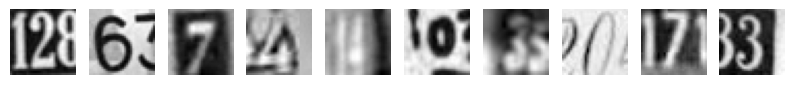

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
plt.figure(figsize = (10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap = "gray")
    plt.axis('off')
plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

In [ ]:
print("Shape:", X_train[0].shape)
print("First image:\n", X_train[0])

Shape: (32, 32)
First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

X_train = X_train / 255.0
X_test = X_test / 255.0

Print the shapes of Training and Test data

In [ ]:
print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)


### **One-hot encode output**

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## **Model Building**

### Fix the seed for random number generators

In [ ]:
np.random.seed(55)
import random
random.seed(55)
tf.random.set_seed(55)

### **Model Architecture**


### **Build and train an ANN model**

In [ ]:
def nn_model_1():
    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence
    model.add(Dense(64, activation='relu', input_shape=(1024,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

# Create the model using the nn_model_1 function
model = nn_model_1()

# Print the summary of the model
model.summary()

# Fit the model on the training data
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=20, verbose=1)

# Save the model history for later visualization
history_dict = history.history

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
263/263 [==============================] - 3s 6ms/step - loss: 2.2941 - accuracy: 0.1209 - val_loss: 2.2544 - val_accuracy: 0.1899
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.1287 - accuracy: 0.2277 - val_loss: 1.9671 - val_accuracy: 0.322

### **Plot the Training and Validation Accuracies**

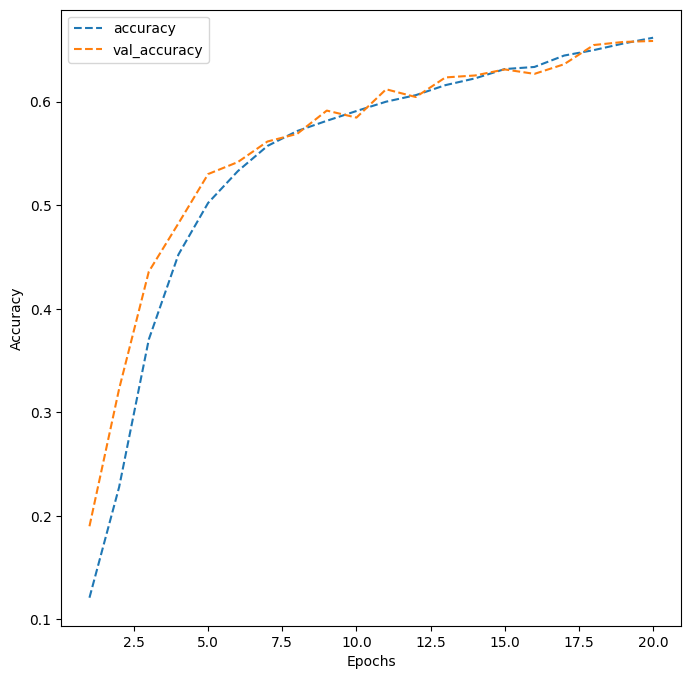

In [ ]:
dict_hist = history.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(55)
import random
random.seed(55)
tf.random.set_seed(55)

### **Second Model Architecture**

### **Build and train the new ANN model**

In [ ]:
def nn_model_2():
    model = Sequential()

    # Add layers as per the architecture mentioned above in the same sequence
    model.add(Dense(256, activation='relu', input_shape=(1024,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.0005),
                  metrics=['accuracy'])

    return model

# Create the model using the nn_model_2 function
model_2 = nn_model_2()

# Print the summary of the model
model_2.summary()

# Fit the model on the training data
history_2 = model_2.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=30, verbose=1)

# Save the model history for later visualization
history_dict_2 = history_2.history

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               262400    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)               

### **Plot the Training and Validation Accuracies and write down your Observations.**

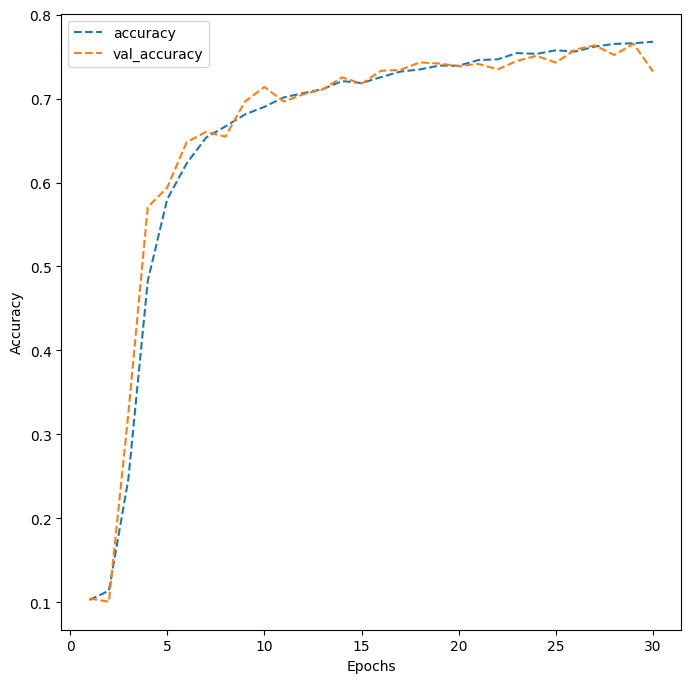

In [ ]:
dict_hist = history_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

## **Predictions on the test data**

In [ ]:
test_predic = model_2.predict(X_test)

test_predic = np.argmax(test_predic, axis = -1)

563/563 [==============================] - 2s 3ms/step


In [ ]:
y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions.**

563/563 [==============================] - 3s 5ms/step
              precision    recall  f1-score   support

           0       0.53      0.88      0.66      1814
           1       0.80      0.75      0.77      1828
           2       0.87      0.69      0.77      1803
           3       0.86      0.58      0.69      1719
           4       0.91      0.72      0.80      1812
           5       0.77      0.68      0.72      1768
           6       0.79      0.70      0.75      1832
           7       0.75      0.83      0.79      1808
           8       0.76      0.66      0.70      1812
           9       0.59      0.81      0.68      1804

    accuracy                           0.73     18000
   macro avg       0.76      0.73      0.73     18000
weighted avg       0.76      0.73      0.74     18000



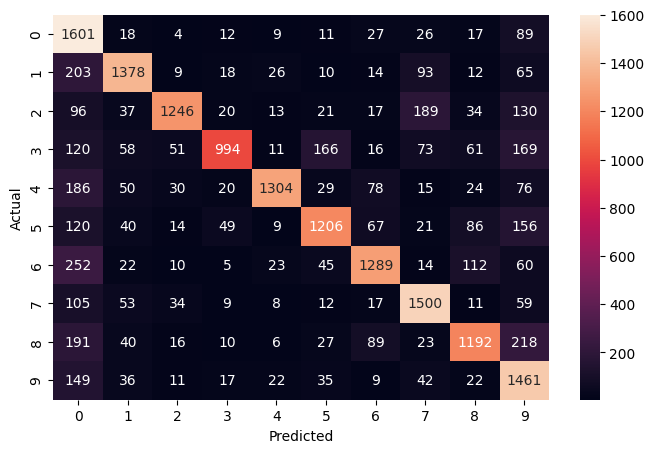

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

y_test_encoded = to_categorical(y_test)

# Make predictions on the test set
test_pred = model_2.predict(X_test)

# Convert predictions from one-hot encoding to label encoding
test_pred_labels = np.argmax(test_pred, axis=-1)
y_test_labels = np.argmax(y_test_encoded, axis=-1)

# Printing the classification report
print(classification_report(y_test_labels, test_pred_labels))

# Creating the confusion matrix
cm = confusion_matrix(y_test_labels, test_pred_labels)

# Plotting the heatmap using the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
import h5py

h5file = h5py.File('/content/drive/MyDrive/Colab Notebooks/SVHN_single_grey1.h5', 'r')

X_train = h5file['X_train'][:]
y_train = h5file['y_train'][:]
X_test = h5file['X_test'][:]
y_test = h5file['y_test'][:]

h5file.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

## **Data preparation**


In [ ]:
print("Shape:", X_train[0].shape)
print("First image:\n", X_train[0])

Shape: (32, 32)
First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255
X_test = X_test / 255

Print New shape of Training and Test

In [ ]:
#new shape

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Test labels

y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

## **Model Building**

In [ ]:
np.random.seed(55)
import random
random.seed(55)
tf.random.set_seed(55)

### **Model Architecture**

In [ ]:
def cnn_model_1():
    model = Sequential()

    # First Convolutional layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output
    model.add(Flatten())

    # Dense layer
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Call the function and store the model in a new variable
cnn_model = cnn_model_1()

# Print the summary of the model
cnn_model.summary()

# Fit the model on the training data
history = cnn_model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=20, verbose=1)

# Store the model building history to use later for visualization
dict_hist = history.history

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                      

### **Plot the Training and Validation Accuracies

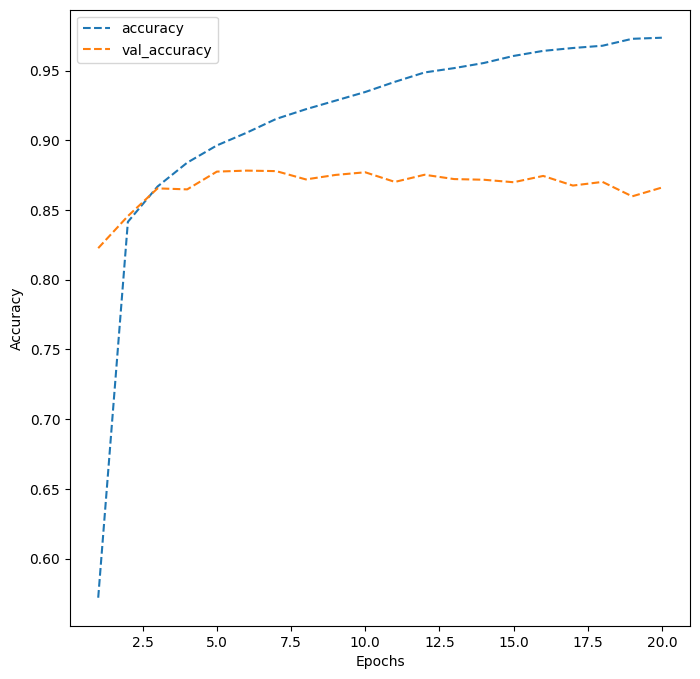

In [ ]:
# Plotting the accuracies

dict_hist = history.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

np.random.seed(55)
import random
random.seed(55)
tf.random.set_seed(55)

### **Second Model Architecture**

### **Build and train the second CNN model**

In [ ]:

def cnn_model_2():
    model = Sequential()

    # First Convolutional layer
    model.add(Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1)))
    model.add(LeakyReLU(alpha=0.1))

    # Second Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Batch normalization layer
    model.add(BatchNormalization())

    # Third Convolutional layer
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Fourth Convolutional layer
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(LeakyReLU(alpha=0.1))

    # Max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Batch normalization layer
    model.add(BatchNormalization())

    # Flatten the output
    model.add(Flatten())

    # Dense layer
    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))

    # Dropout layer
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

# Call the function and store the model in a new variable
cnn_model = cnn_model_2()

# Print the summary of the model
cnn_model.summary()

# Fit the model on the training data
history = cnn_model.fit(X_train, y_train, validation_split=0.2, batch_size=128, epochs=30, verbose=1)

# Store the model building history to use later for visualization
dict_hist = history.history

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

### **Plot the Training and Validation accuracies**

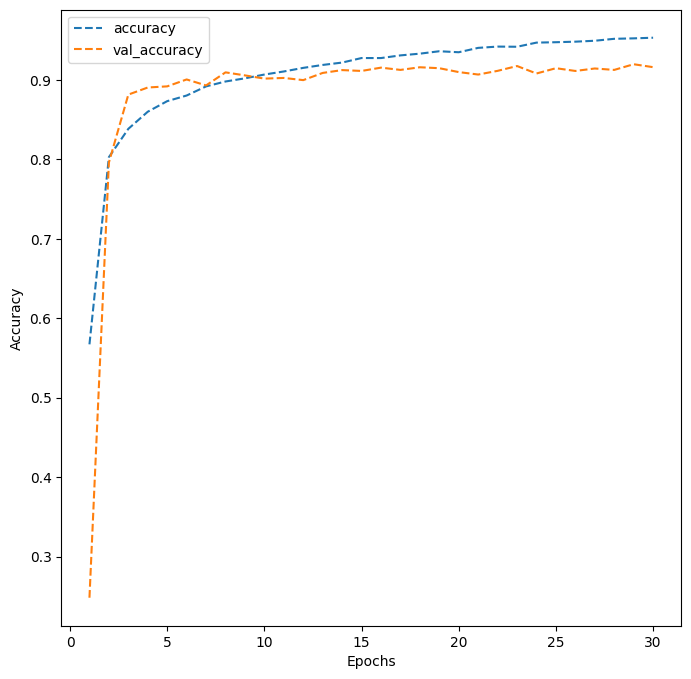

In [ ]:
# Plotting the accuracies

dict_hist = history.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

## **Predictions on the test data**


### **Make predictions on the test data using the second model.**

In [ ]:
test_pred = cnn_model.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 17s 30ms/step


In [ ]:
y_test = np.argmax(y_test, axis = -1)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1814
           1       0.87      0.93      0.90      1828
           2       0.93      0.93      0.93      1803
           3       0.90      0.88      0.89      1719
           4       0.95      0.91      0.93      1812
           5       0.87      0.94      0.90      1768
           6       0.94      0.87      0.90      1832
           7       0.94      0.92      0.93      1808
           8       0.92      0.90      0.91      1812
           9       0.92      0.92      0.92      1804

    accuracy                           0.91     18000
   macro avg       0.92      0.91      0.91     18000
weighted avg       0.92      0.91      0.91     18000



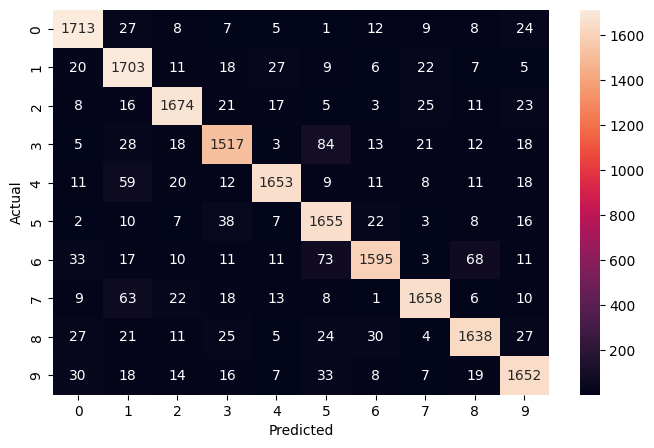

In [ ]:
# Importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()